In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd
# Librerias para graficar
from matplotlib import pyplot
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline



In [3]:
# Leer el archivo CSV por pandas y tomar 30000 datos
data = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/diabetes_binary_health_indicators_BRFSS2015.csv')


# Verificar que ya no hay valores NaN en el DataFrame
print("Cantidad de NaN por columna después de llenar los datos faltantes:")
print(data.isna().sum())

data.info()

Cantidad de NaN por columna después de llenar los datos faltantes:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              25

In [4]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202944 entries, 31141 to 121958
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       202944 non-null  float64
 1   HighBP                202944 non-null  float64
 2   HighChol              202944 non-null  float64
 3   CholCheck             202944 non-null  float64
 4   BMI                   202944 non-null  float64
 5   Smoker                202944 non-null  float64
 6   Stroke                202944 non-null  float64
 7   HeartDiseaseorAttack  202944 non-null  float64
 8   PhysActivity          202944 non-null  float64
 9   Fruits                202944 non-null  float64
 10  Veggies               202944 non-null  float64
 11  HvyAlcoholConsump     202944 non-null  float64
 12  AnyHealthcare         202944 non-null  float64
 13  NoDocbcCost           202944 non-null  float64
 14  GenHlth               202944 non-null  float64
 

Se llama a la función implementada para mostrar los datos cargados:

In [5]:
# Verificar que valores tiene la columna 'Diabetes_binary'
print(data['Diabetes_binary'].unique())


[0. 1.]


In [6]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [22]:
# Para los datos de entrenamiento
y = train_data.iloc[:, 0]
X = train_data.iloc[:, 1:22]
m = y.size

# Para los datos de prueba
y_test = test_data.iloc[:, 0]
X_test = test_data.iloc[:, 1:22]
m_test = y_test.size

In [23]:
y

31141     0.0
98230     0.0
89662     1.0
208255    0.0
233415    0.0
         ... 
119879    0.0
103694    0.0
131932    0.0
146867    0.0
121958    1.0
Name: Diabetes_binary, Length: 202944, dtype: float64

In [24]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [25]:
X_norm, mu, sigma= featureNormalize(X)

In [26]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [27]:
# 21 columnas
X_norm

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
31141,-0.865390,1.166346,0.196705,-1.266092,1.121615,-0.205655,-0.322556,0.566448,0.759129,0.481542,...,0.226927,-0.303036,-0.479136,-0.429902,-0.487197,-0.449845,1.127175,1.299401,0.962174,0.939707
98230,-0.865390,-0.857379,0.196705,0.851152,-0.891572,-0.205655,-0.322556,0.566448,-1.317300,0.481542,...,0.226927,-0.303036,0.456986,-0.429902,-0.487197,-0.449845,1.127175,-0.010752,-0.051302,0.939707
89662,1.155549,1.166346,0.196705,-0.661165,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,...,0.226927,-0.303036,-0.479136,-0.429902,0.086139,-0.449845,1.127175,1.299401,-0.051302,-0.025387
208255,-0.865390,1.166346,0.196705,-0.207470,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,...,0.226927,-0.303036,-1.415258,-0.429902,-0.487197,-0.449845,1.127175,-0.993367,0.962174,0.457160
233415,-0.865390,1.166346,0.196705,-0.661165,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,...,0.226927,-0.303036,0.456986,-0.429902,-0.487197,2.222989,-0.887173,1.299401,-1.064778,-0.025387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.155549,-0.857379,0.196705,2.514702,1.121615,-0.205655,-0.322556,0.566448,0.759129,-2.076663,...,0.226927,3.299943,-1.415258,1.589859,-0.487197,-0.449845,-0.887173,-0.993367,-1.064778,-2.438122
103694,1.155549,1.166346,0.196705,0.094994,1.121615,-0.205655,-0.322556,0.566448,-1.317300,0.481542,...,0.226927,-0.303036,0.456986,-0.429902,-0.487197,-0.449845,1.127175,0.971863,0.962174,0.457160
131932,-0.865390,1.166346,0.196705,-0.509933,-0.891572,-0.205655,-0.322556,0.566448,0.759129,0.481542,...,0.226927,-0.303036,-0.479136,-0.429902,-0.143195,-0.449845,-0.887173,0.316786,0.962174,0.939707
146867,-0.865390,-0.857379,-5.083743,-0.812397,-0.891572,-0.205655,-0.322556,-1.765388,0.759129,0.481542,...,0.226927,3.299943,-0.479136,-0.429902,-0.487197,-0.449845,-0.887173,-0.993367,0.962174,-0.025387


In [28]:
def calcularCostoWithReg(theta, X, y, lambda_):
    m = y.size 

    J = 0
    
    # funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    # Calcular el término de regularización
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    # Sumar el término de regularización al costo total
    J += regularization_term

    return J

In [29]:
def descensoGradienteWithReg(theta, X, y, alpha, lambda_, num_iters):
   
    m = y.shape[0] 

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        
        # Calcula el gradiente descendente sin regularización
        gradient = (1 / m) * X.T.dot(h - y)
        
        # Calcula el término de regularización (excepto para el término de sesgo theta[0])
        regularization_term = (lambda_ / m) * theta[1:]
        
        # theta[0] -= alpha * (1 / m) * np.sum(h - y)
        theta[0] -= alpha * gradient[0]
        theta[1:] -= alpha * (gradient[1:]+ regularization_term)

        # Calcula y guarda el costo en cada iteración
        J_history.append(calcularCostoWithReg(theta, X, y, lambda_))
        
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.4638185   0.56709907  0.42287852 -0.23326906  0.01792104 -0.11162174
  0.0761825   0.24592374 -0.23807894 -0.11829705 -0.16878461 -0.13392618
 -0.2173855  -0.1024343   0.21604749 -0.01055932  0.00390794  0.18286103
  0.09880187  0.02608182 -0.35891785 -0.11257834]
0.12973570519273442


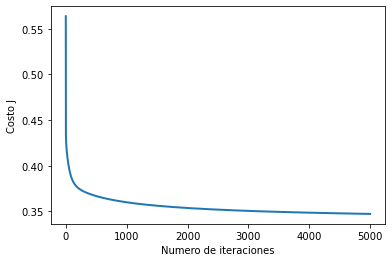

In [69]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 5000
lambda_ = 100
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)
theta, J_history = descensoGradienteWithReg(theta, X, y, alpha, lambda_ , num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(aprueba)

In [70]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [71]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)




[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [72]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

In [73]:
X_test_1 = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)


In [74]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_1:
    y_predicha.append(sigmoid(np.dot(dato, theta)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

print(y.shape)

(202944,)


In [75]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test.iloc[0]) * 100))

Precisión de entrenamiento: 64.27 %
